In [1]:
import networkx as nx
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

In [2]:
n = 10000
p = 0.00005
G = nx.erdos_renyi_graph(n, p)

In [3]:
components = nx.connected_components(G)

In [4]:
component_sizes = [len(component) for component in components]

In [5]:
component_distribution = {}
for size in component_sizes:
    if size in component_distribution:
        component_distribution[size] += 1
    else:
        component_distribution[size] = 1

In [6]:
max_size = max(component_distribution.keys())

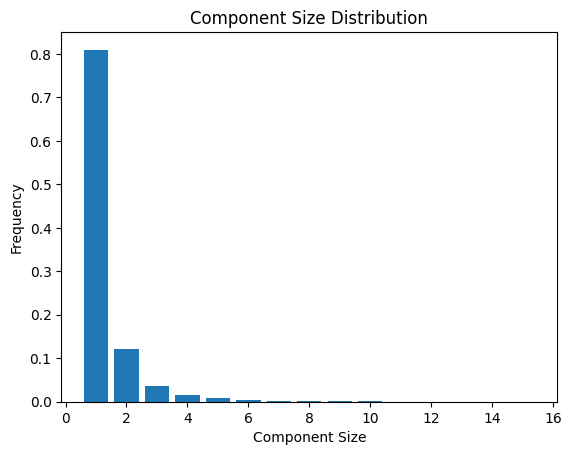

In [7]:
sizes, counts = zip(*sorted(component_distribution.items()))
counts = [count/len(component_sizes) for count in counts]
plt.bar(sizes, counts)
plt.xlabel('Component Size')
plt.ylabel('Frequency')
plt.title('Component Size Distribution')
plt.show()

In [8]:
degrees = dict(G.degree())

In [9]:
degrees = [d for n, d in G.degree()]
max_degree = max(degrees) + 1
freq = [degrees.count(d)/n for d in range(max_degree)]
x = sp.symbols('x')
G_0 = sum((0.5 ** k)*(math.exp(-0.5))/ math.factorial(k) * x**k for k in range(max_degree))
G_0_prime = sp.diff(G_0, x)
G_0_prime_at_1 = G_0_prime.subs(x, 1)
G_1 = G_0_prime / G_0_prime_at_1

In [10]:
G_0

0.000157950692633498*x**5 + 0.00157950692633498*x**4 + 0.0126360554106799*x**3 + 0.0758163324640792*x**2 + 0.303265329856317*x + 0.606530659712633

In [11]:
G_1

0.00157977883096367*x**4 + 0.0126382306477093*x**3 + 0.0758293838862559*x**2 + 0.303317535545024*x + 0.606635071090047

In [12]:
sp.Poly(G_1, x).degree()

4

In [13]:
H_1 = x

In [14]:
P_list = []

In [15]:
while sp.Poly(H_1, x).degree() < max_size:
    H_1 = G_1.subs(x, H_1)

In [16]:
sp.expand(H_1)

9.8396907644155e-15*x**16 + 3.14870104461296e-13*x**15 + 5.66766188030333e-12*x**14 + 7.30498642350207e-11*x**13 + 7.85364758052587e-10*x**12 + 7.24138266240088e-9*x**11 + 5.83353545133354e-8*x**10 + 4.11804755340333e-7*x**9 + 2.7195637920674e-6*x**8 + 1.64475321059927e-5*x**7 + 9.1192180899835e-5*x**6 + 0.000451181977342998*x**5 + 0.00237968728641948*x**4 + 0.0103566585224561*x**3 + 0.0405552196497213*x**2 + 0.12456723858032*x + 0.821579176461042

In [17]:
sp.expand(x * G_0.subs(x, H_1))

1.45689678272457e-74*x**81 + 2.33103485235931e-72*x**80 + 1.91144857893463e-70*x**79 + 1.06854637632151e-68*x**78 + 4.57550089788912e-67*x**77 + 1.59952469333915e-65*x**76 + 4.75269707632955e-64*x**75 + 1.23399126913594e-62*x**74 + 2.8566040946933e-61*x**73 + 5.9864077518818e-60*x**72 + 1.14924434792269e-58*x**71 + 2.04031842752689e-57*x**70 + 3.37571864056952e-56*x**69 + 5.23820368121996e-55*x**68 + 7.66418850083353e-54*x**67 + 1.06215548984863e-52*x**66 + 1.39971687616858e-51*x**65 + 1.75990621909581e-50*x**64 + 2.11747846009545e-49*x**63 + 2.44432651075853e-48*x**62 + 2.71339825664244e-47*x**61 + 2.90253993064746e-46*x**60 + 2.9974959519722e-45*x**59 + 2.99352383149708e-44*x**58 + 2.89542433115948e-43*x**57 + 2.7161378579916e-42*x**56 + 2.47432699157141e-41*x**55 + 2.19149875278481e-40*x**54 + 1.88921129877914e-39*x**53 + 1.58678905976461e-38*x**52 + 1.29978989561466e-37*x**51 + 1.03928164006387e-36*x**50 + 8.11834908526891e-36*x**49 + 6.20046181724509e-35*x**48 + 4.633725017018e-34

In [18]:
H_1 = sp.expand(H_1)
print("hi")
H_0 = x * G_0.subs(x, H_1)
H_0 = sp.expand(H_0)
den = 1
print("hi")
for i in range(max_size):
    print("Hi")
    H_0_prime = H_0
    den *= (i+1)
    for j in range(i+1):
        H_0_prime = sp.diff(H_0_prime, x)
    H_0_prime = H_0_prime.subs(x, 0)
    P_s = 1 / den * H_0_prime
    P_list.append(P_s)

hi
hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi


In [19]:
P_list

[0.914648801252666,
 0.0569639552236556,
 0.0203182574179147,
 0.00592674885691135,
 0.00160705223597218,
 0.000391432507957791,
 9.86554114457856e-5,
 2.37064904155531e-5,
 5.56361210825724e-6,
 1.28378016456513e-6,
 2.93365535675509e-7,
 6.60501092045525e-8,
 1.47139853687697e-8,
 3.24347824443862e-9,
 7.07037337856078e-10]

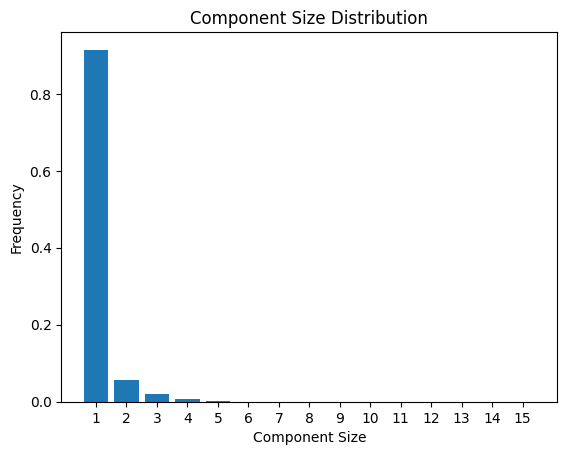

In [21]:
positions = [str(i) for i in range(1, len(P_list) + 1)]

plt.bar(positions, P_list)
plt.xlabel('Component Size')
plt.ylabel('Frequency')
plt.title('Component Size Distribution')
plt.show()

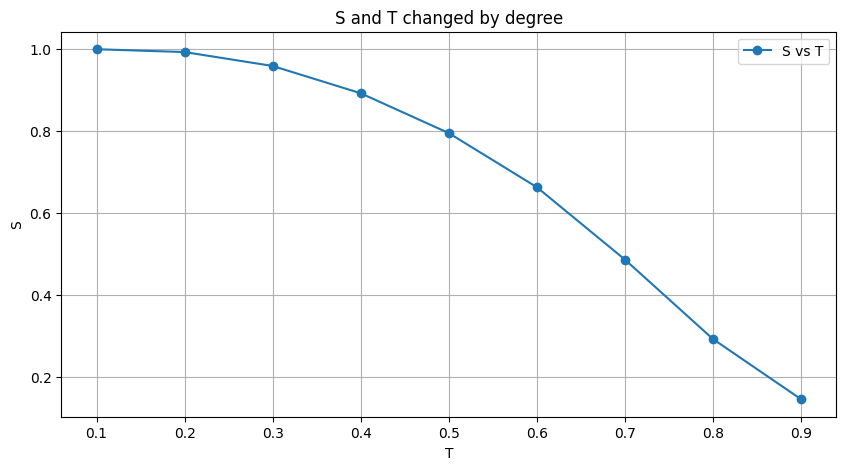

In [22]:
S_list = []
T_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for T in T_list:
    S = 0.1
    for i in range(10):
        S = 1 - math.exp(-1 * S / T)
    S_list.append(S)

plt.figure(figsize=(10, 5)) 
plt.plot(T_list, S_list, label='S vs T', marker='o') 

# plt.plot(degrees, T_list, label='T', marker='s', linestyle='--')  

plt.title('S and T changed by degree')
plt.xlabel('T')
plt.ylabel('S')

plt.legend()

plt.grid(True)
plt.show()

In [23]:
N = 1001

G_0 = 0
for k in range(2, int(math.sqrt(N))):
    p_k = k**(-2.5)
    G_0 += p_k * x**k
G_0_prime = sp.diff(G_0, x)
G_0_prime_twice = sp.diff(G_0_prime, x)
G_0_prime_at_1 = G_0_prime.subs(x, 1)
G_1 = G_0_prime / G_0_prime_at_1
G_0_prime_twice_at_1 = G_0_prime_twice.subs(x, 1)
T_c = G_0_prime_at_1 / G_0_prime_twice_at_1

In [24]:
T_c

0.170451808845373

In [25]:
H_1 = x

In [26]:
while sp.Poly(H_1, x).degree() < max_size:
    H_1 = G_1.subs(x, H_1)

H_1_at_1 = H_1.subs(x, 1)
S = 1 - G_0.subs(x, H_1_at_1)

In [52]:
S

0.659184430248537